In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('/content/Ice Cream.csv')

In [4]:
print(df.head())

   Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317


In [6]:
print("Shape:", df.shape)

Shape: (500, 2)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


In [8]:
print(df.describe())

       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000


In [9]:
#prepocessing
print(df.isnull().sum())
df = df.dropna()
df.columns = ['Temperature', 'Revenue']

Temperature    0
Revenue        0
dtype: int64


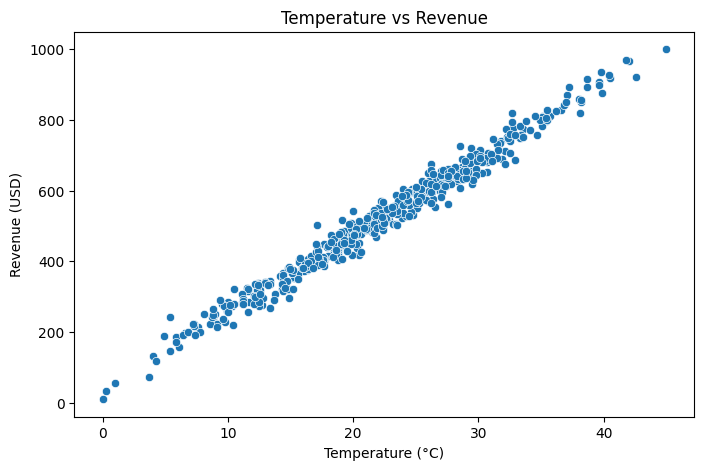

In [11]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title("Temperature vs Revenue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue (USD)")
plt.show()


In [12]:
# Correlation
correlation = df.corr()
print("Correlation matrix:\n", correlation)

Correlation matrix:
              Temperature   Revenue
Temperature     1.000000  0.989841
Revenue         0.989841  1.000000


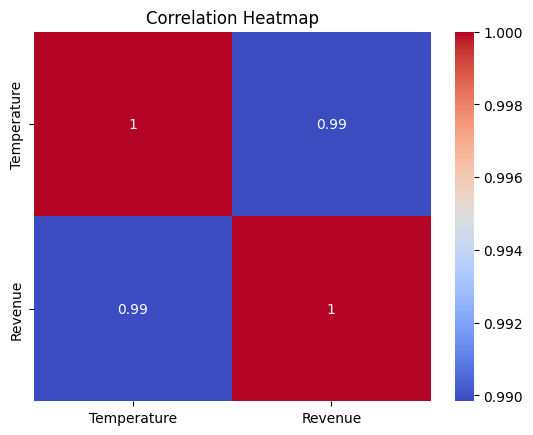

In [13]:
# Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [14]:
x = df[['Temperature']]
y = df[['Revenue']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)

In [26]:
def evaluate_model(name, y_test, preds):
    print(f" {name} Performance:")
    print("R² Score:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    print("—" * 30)

In [28]:
evaluate_model("Linear Regression", y_test, lr_preds)

 Linear Regression Performance:
R² Score: 0.9771509516333023
MAE: 19.195652579103704
RMSE: 25.543958747446354
——————————————————————————————
